In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

Mounted at /content/drive


In [2]:
import pandas as pd

# Assuming your file is in Excel format, use read_excel
data = pd.read_excel('/content/drive/MyDrive/ecg_eeg/emotional.xlsx')
data.head()


,Age,gender,majors,tmms_repair,tmms_attention,tmms_clarity,tmms_totalscore,Subjectivesleepquality,Sleeplatency,Sleepduration,Sleepefficiency,Sleepdisturbance,Useofsleepmedication,Daytimedysfunction,psqiglobalscore,perceived_healthstatus
0,26,0,0,22,35,36,93,0,1,1,0,0,0,1,3,0
1,29,1,1,20,50,50,120,1,0,0,0,1,0,1,3,0
2,29,0,0,30,39,39,108,2,2,1,2,2,3,1,13,0
3,27,0,2,14,47,37,98,2,2,1,3,2,0,1,11,0
4,24,1,0,30,55,41,126,0,0,0,0,1,0,0,1,0


In [3]:
X = data.drop('psqiglobalscore', axis=1)
y = data['psqiglobalscore']


print(X,y)



     Age  gender  majors  tmms_repair  tmms_attention  tmms_clarity  \
0     26       0       0           22              35            36   
1     29       1       1           20              50            50   
2     29       0       0           30              39            39   
3     27       0       2           14              47            37   
4     24       1       0           30              55            41   
..   ...     ...     ...          ...             ...           ...   
513   22       1       0           25              56            41   
514   25       1       1           19              51            35   
515   21       1       0           20              47            43   
516   21       1       0           18              49            16   
517   20       1       1           26              49            41   

     tmms_totalscore  Subjectivesleepquality  Sleeplatency  Sleepduration  \
0                 93                       0             1            

Data Summary:
   Age  gender  majors  tmms_repair  tmms_attention  tmms_clarity  \
0   26       0       0           22              35            36   
1   29       1       1           20              50            50   
2   29       0       0           30              39            39   
3   27       0       2           14              47            37   
4   24       1       0           30              55            41   

   tmms_totalscore  Subjectivesleepquality  Sleeplatency  Sleepduration  \
0               93                       0             1              1   
1              120                       1             0              0   
2              108                       2             2              1   
3               98                       2             2              1   
4              126                       0             0              0   

   Sleepefficiency  Sleepdisturbance  Useofsleepmedication  \
0                0                 0                     0

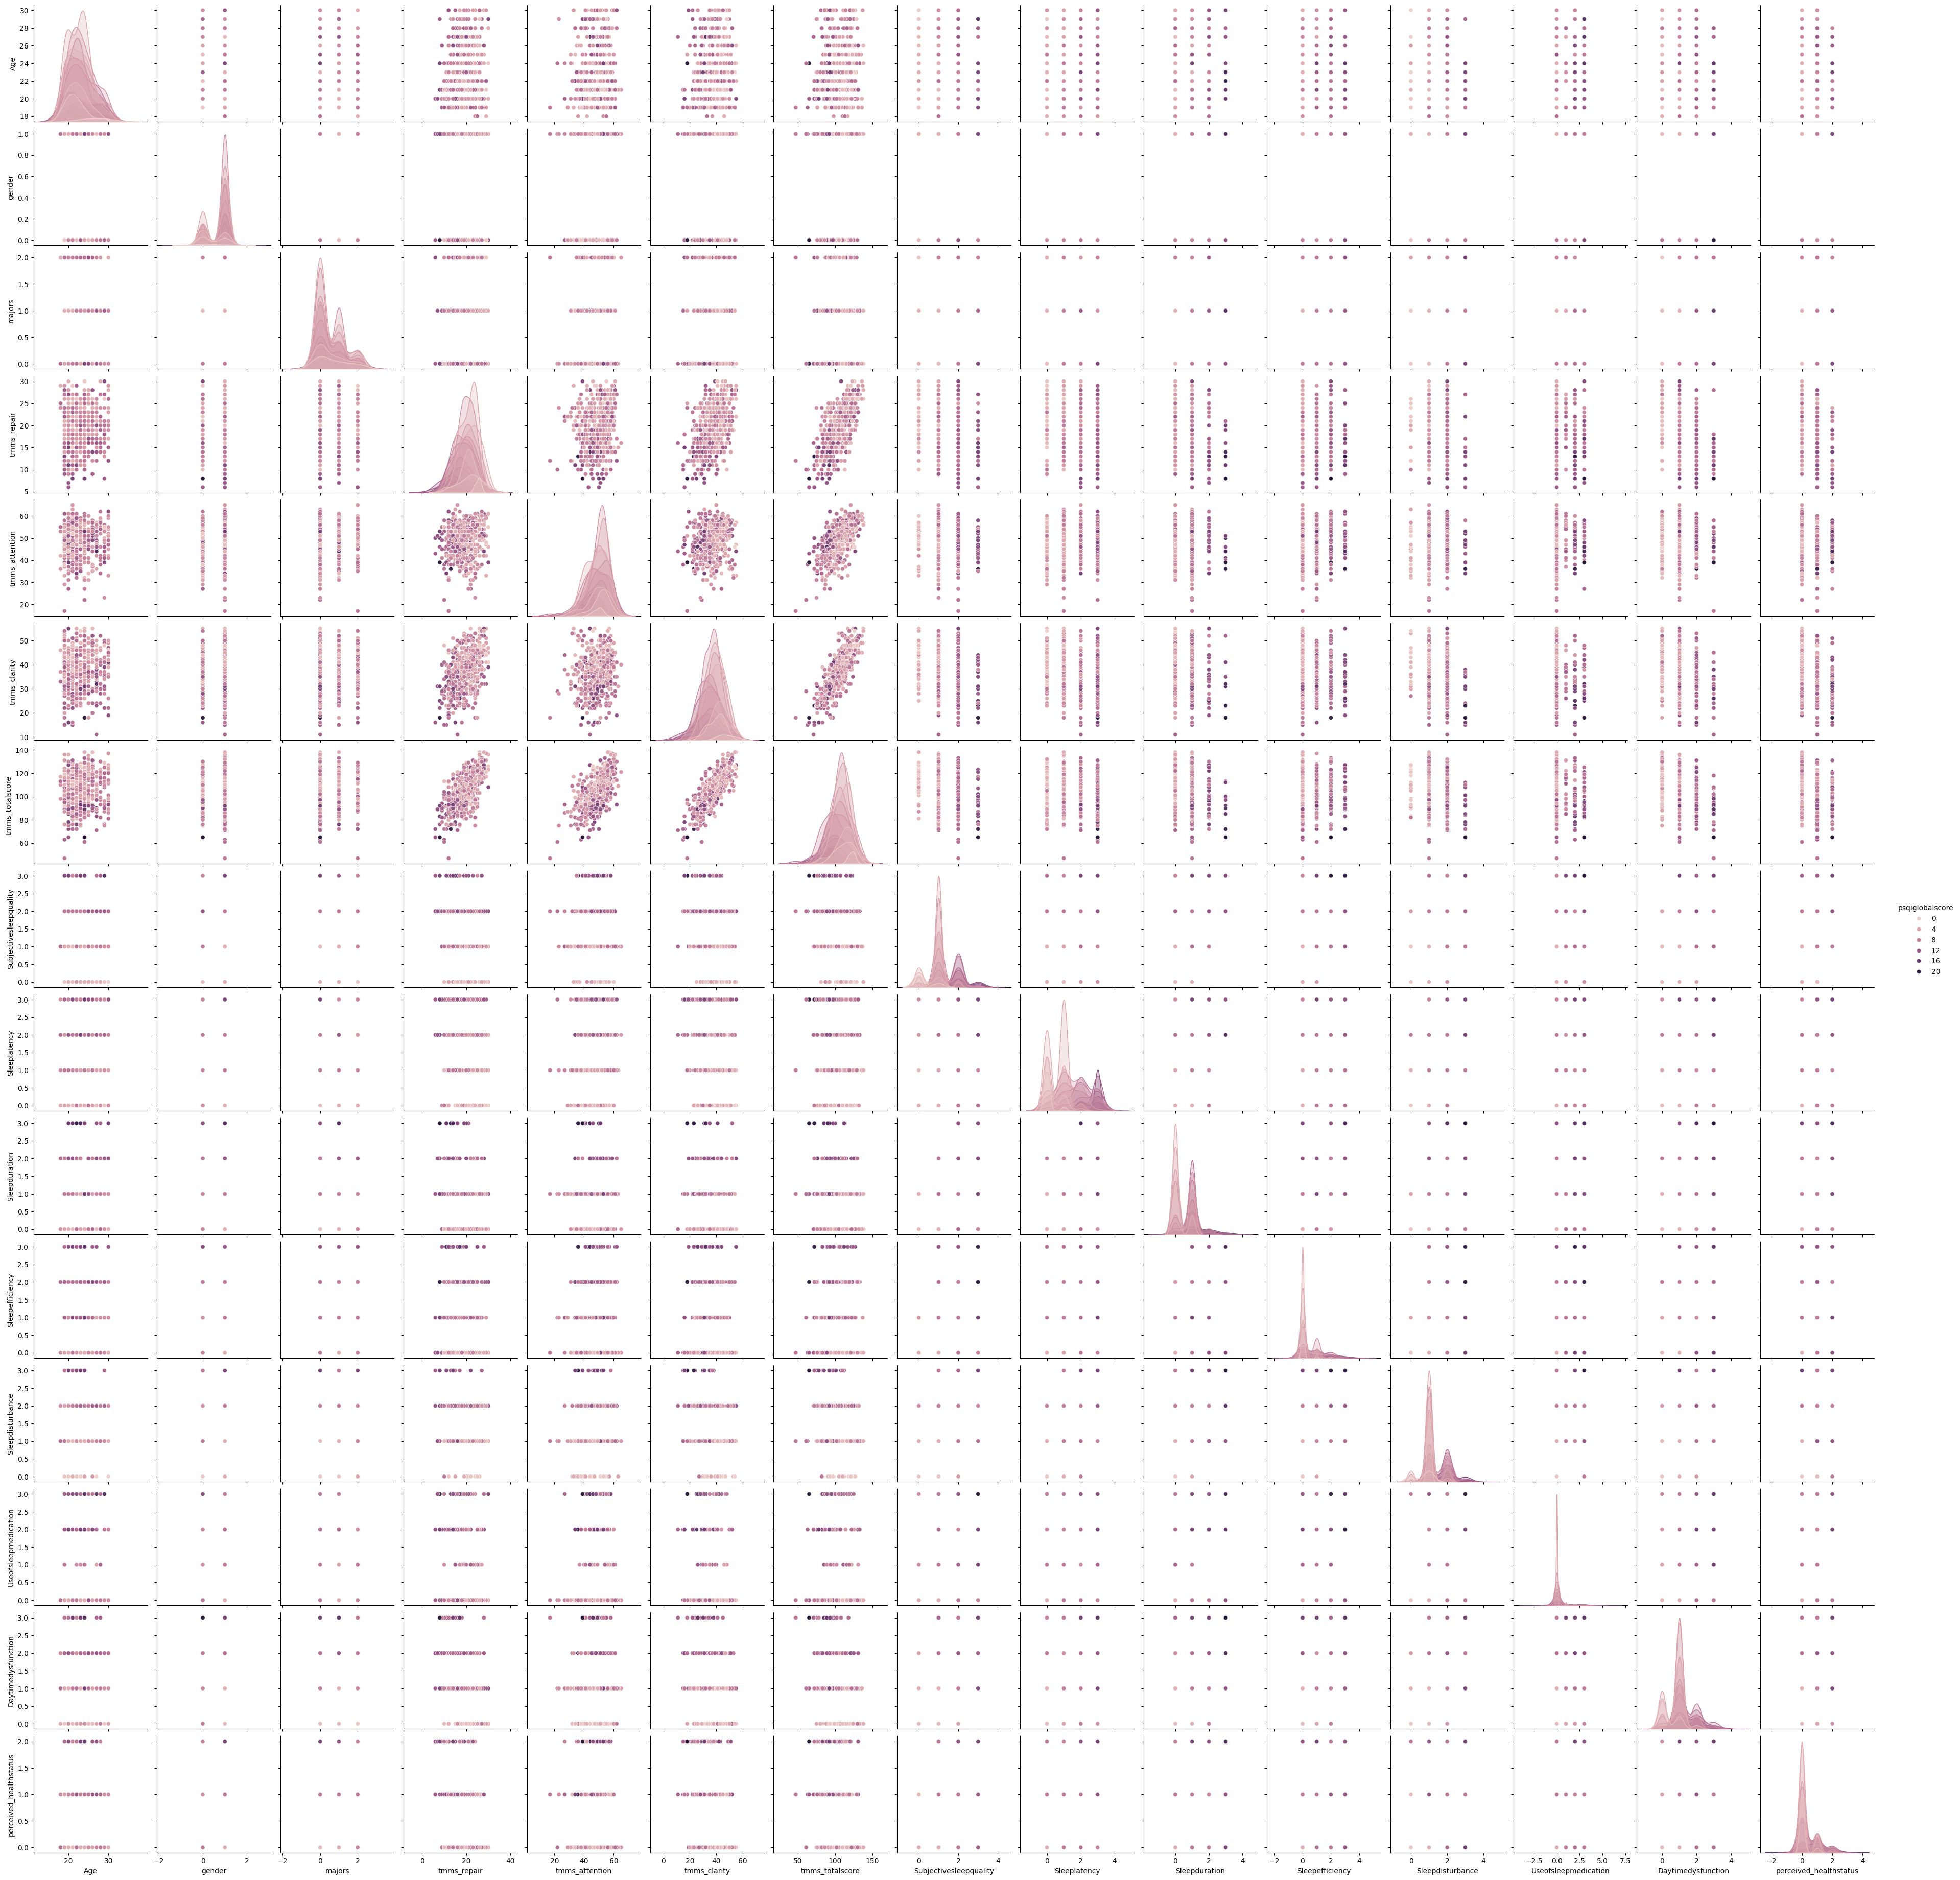

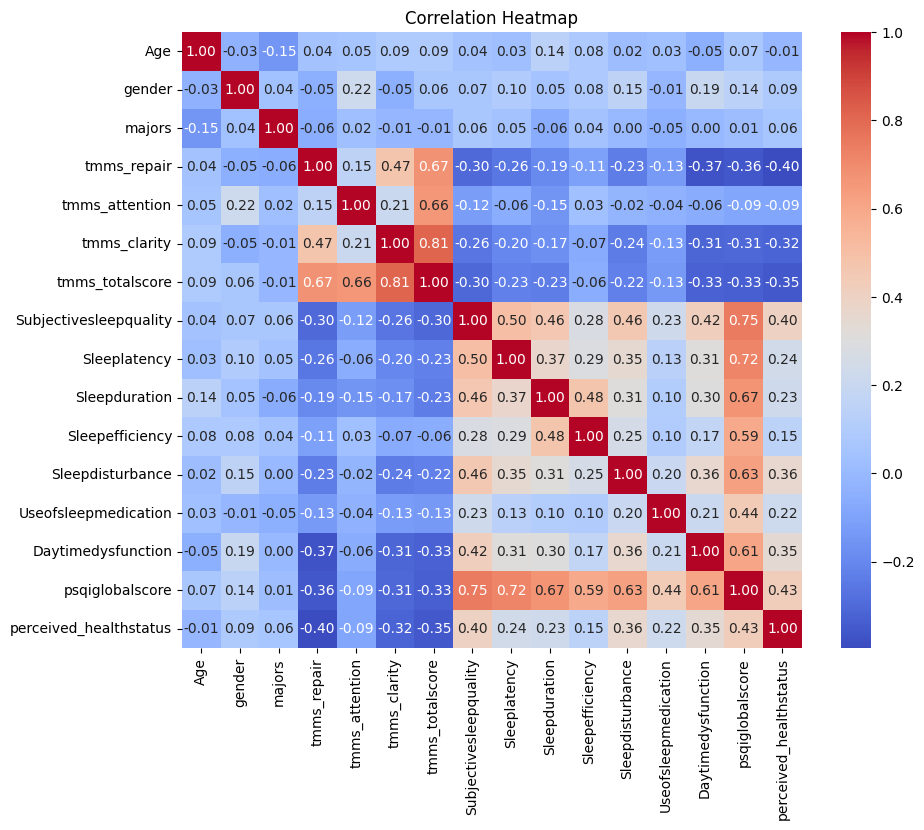

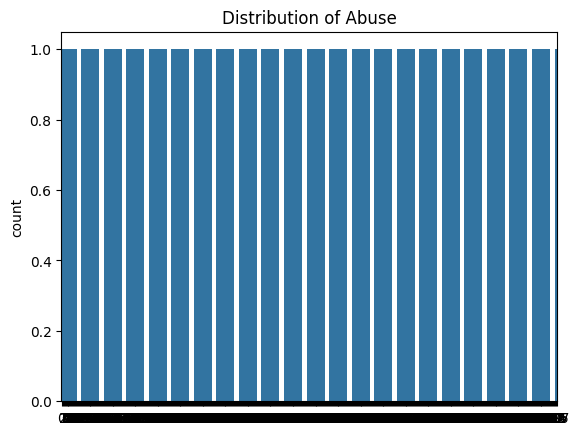

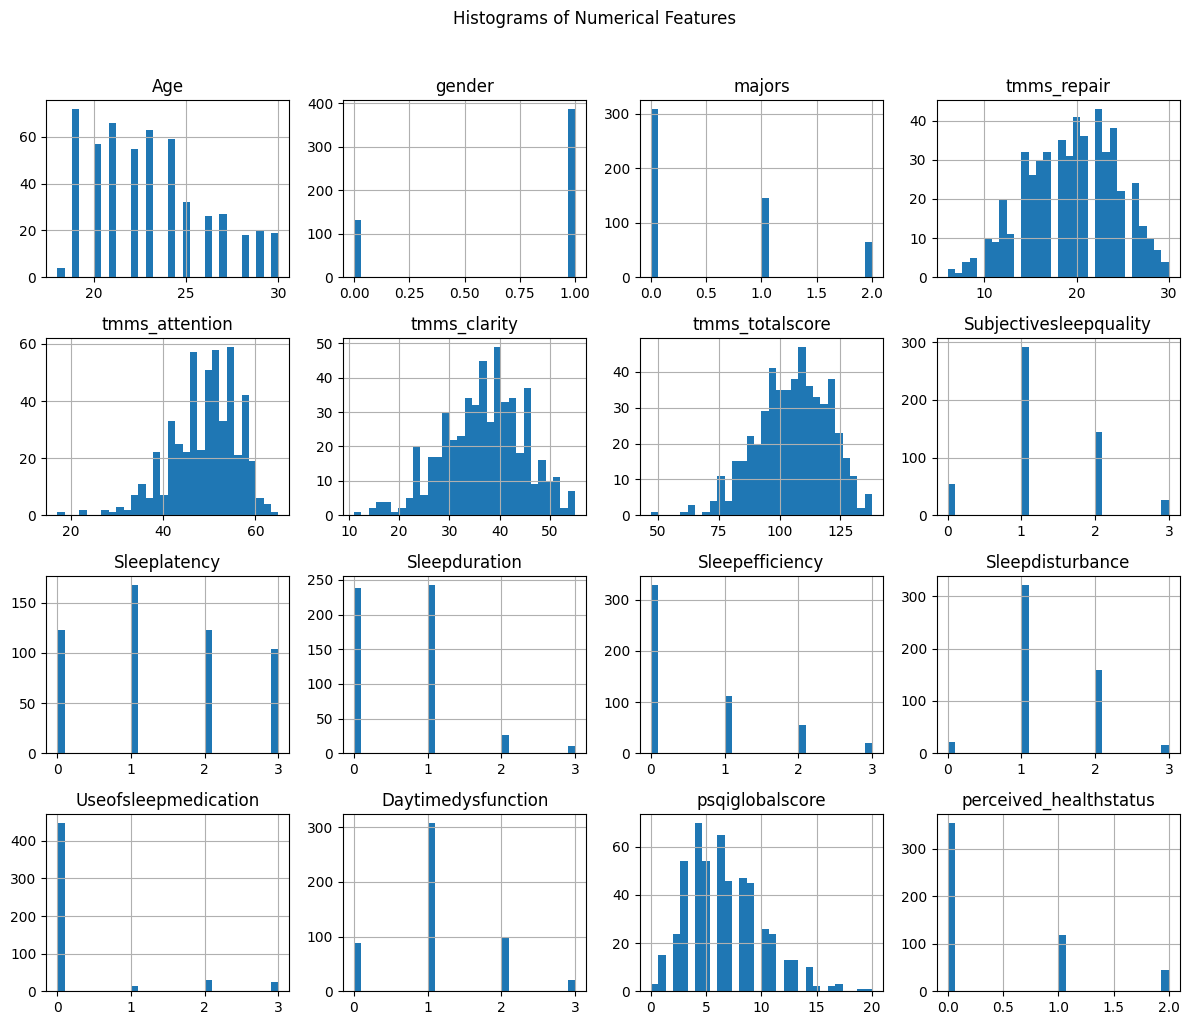

<Figure size 1200x800 with 0 Axes>

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
# Data Summary
print("Data Summary:")
print(data.head())
print("\nData Info:")
print(data.info())
print("\nData Statistics:")
print(data.describe())

# Data Visualization and EDA
# Pairplot for visualizing relationships between features
sns.pairplot(data, hue='psqiglobalscore', diag_kind='kde')
plt.show()

# Correlation Heatmap
corr = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Distribution of the target variable 'VirusDetected'
sns.countplot(data['psqiglobalscore'])
plt.title('Distribution of Abuse')
plt.show()

# Histograms of numerical features
data.hist(figsize=(12, 10), bins=30)
plt.suptitle("Histograms of Numerical Features", y=1.02)
plt.tight_layout()
plt.show()

# Boxplots for numerical features by VirusDetected
numerical_features = data.select_dtypes(include=['float64']).columns
num_features_count = len(numerical_features)
num_subplots = min(num_features_count, 8)  # Adjusted to ensure maximum 8 subplots

plt.figure(figsize=(12, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(x='psqiglobalscore', y=feature, data=data)
    plt.title(f'{feature} by psqiglobalscore')
    if i == num_subplots:  # Break loop after 8 subplots
        break

plt.tight_layout()
plt.show()


In [6]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Split the data into train, test, and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [8]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

Cross-Validation RMSE Scores: [0.90355104 1.04790628 0.98989363 0.99280823 0.85332771]
Mean Cross-Validation RMSE: 0.9574973775982578


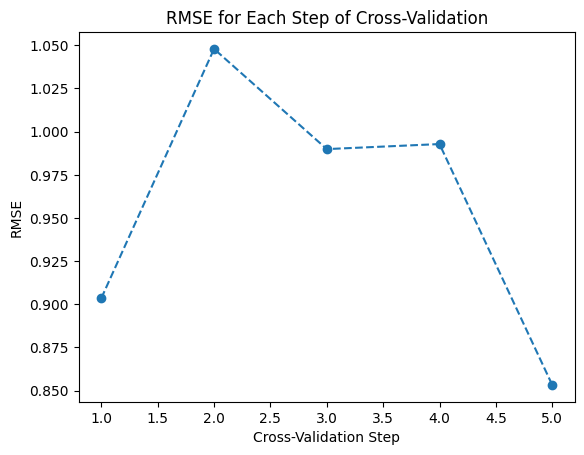

In [9]:
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train, y_train)
cv_scores = cross_val_score(rf_regressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = (-cv_scores) ** 0.5
print("Cross-Validation RMSE Scores:", cv_rmse_scores)
print("Mean Cross-Validation RMSE:", cv_rmse_scores.mean())

# Plot RMSE for each step of cross-validation
plt.plot(range(1, 6), cv_rmse_scores, marker='o', linestyle='--')
plt.xlabel('Cross-Validation Step')
plt.ylabel('RMSE')
plt.title('RMSE for Each Step of Cross-Validation')
plt.show()

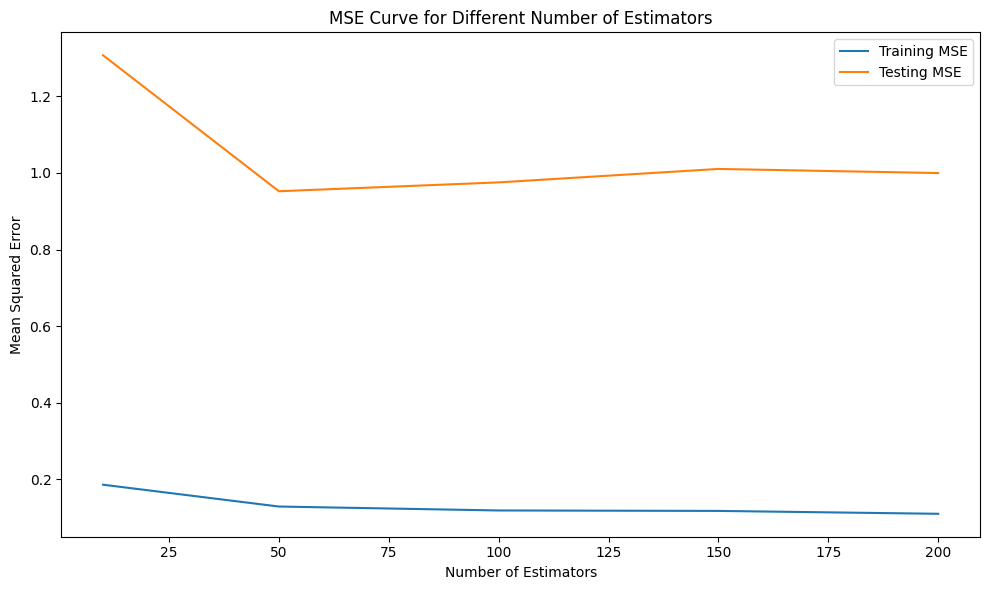

In [10]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Define a range of number of trees (estimators)
num_estimators = [10, 50, 100, 150, 200]

train_errors = []
test_errors = []



for n in num_estimators:
    # Train the random forest regression model
    model = RandomForestRegressor(n_estimators=n)
    model.fit(X_train, y_train)

    # Make predictions on the training and testing sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate the mean squared errors
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)

    # Append the errors to the lists
    train_errors.append(train_error)
    test_errors.append(test_error)

# Plot the MSE curve
plt.figure(figsize=(10, 6))
plt.plot(num_estimators, train_errors, label='Training MSE')
plt.plot(num_estimators, test_errors, label='Testing MSE')
plt.title('MSE Curve for Different Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.tight_layout()
plt.show()


Mean Squared Error: 0.9968778846153845
Mean Absolute Error: 0.6385576923076923
Validation Mean Squared Error: 0.8954216867469879
Validation Mean Absolute Error: 0.7002409638554216


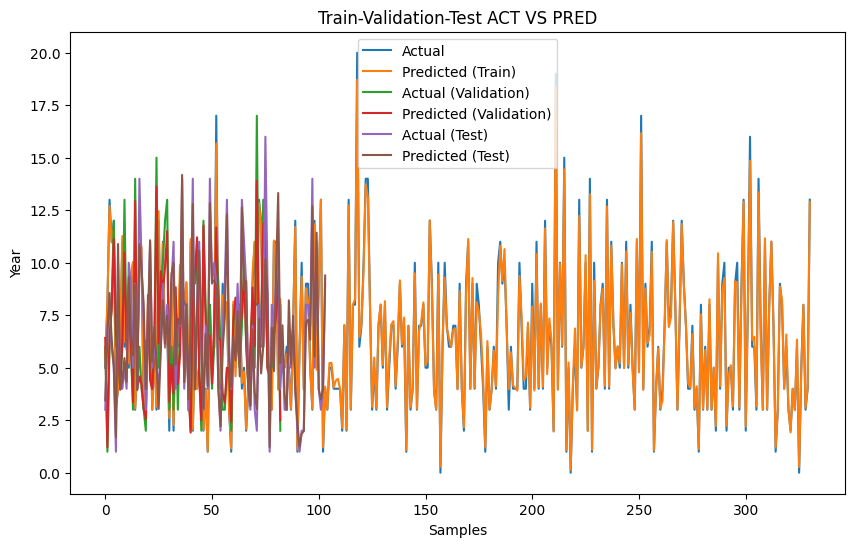

In [12]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
# Predict on the test set
y_pred_test = rf_regressor.predict(X_test)

# Calculate evaluation metrics (e.g., Mean Squared Error, Mean Absolute Error)
mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)

# Print the evaluation metrics
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

# Predict on the validation set
y_pred_val = rf_regressor.predict(X_val)

# Calculate evaluation metrics for validation set
mse_val = mean_squared_error(y_val, y_pred_val)
mae_val = mean_absolute_error(y_val, y_pred_val)

# Print the evaluation metrics for validation set
print("Validation Mean Squared Error:", mse_val)
print("Validation Mean Absolute Error:", mae_val)



# Calculate the training set predictions
y_pred_train = rf_regressor.predict(X_train)

# Calculate the training set mean squared error
mse_train = mean_squared_error(y_train, y_pred_train)

# Plot the train-test-validation loss curves
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_train)), y_train, label='Actual')
plt.plot(range(len(y_pred_train)), y_pred_train, label='Predicted (Train)')
plt.plot(range(len(y_val)), y_val, label='Actual (Validation)')
plt.plot(range(len(y_pred_val)), y_pred_val, label='Predicted (Validation)')
plt.plot(range(len(y_test)), y_test, label='Actual (Test)')
plt.plot(range(len(y_pred_test)), y_pred_test, label='Predicted (Test)')
plt.xlabel('Samples')
plt.ylabel('Year')
plt.title('Train-Validation-Test ACT VS PRED')
plt.legend()
plt.show()


In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Define the number of estimators
num_estimators = 100  # You can change this to your desired number

# Create and evaluate Random Forest Regressor with a specific number of estimators
forest_model = RandomForestRegressor(n_estimators=num_estimators, random_state=42)
forest_model.fit(X_train, y_train)
forest_pred = forest_model.predict(X_test)

mae = mean_absolute_error(y_test, forest_pred)
mse = mean_squared_error(y_test, forest_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, forest_pred)  # Import r2_score from sklearn.metrics
rmsle = np.sqrt(np.mean(np.log1p(forest_pred) - np.log1p(y_test)) ** 2)
mape = np.mean(np.abs((y_test - forest_pred) / y_test)) * 100

#print(f"\nRandom Forest Regressor Model with {num_estimators} Estimators:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


Mean Absolute Error (MAE): 0.62
Mean Squared Error (MSE): 0.95
Root Mean Squared Error (RMSE): 0.97
R-squared (R2): 0.91
Root Mean Squared Logarithmic Error (RMSLE): 0.00
Mean Absolute Percentage Error (MAPE): 10.42%


Cross-Validation RMSE Scores: [1.28674114e-14 2.29051096e-14 4.30407595e-14 6.06009650e-14
 1.79560991e-14]
Mean Cross-Validation RMSE: 3.147406892477059e-14


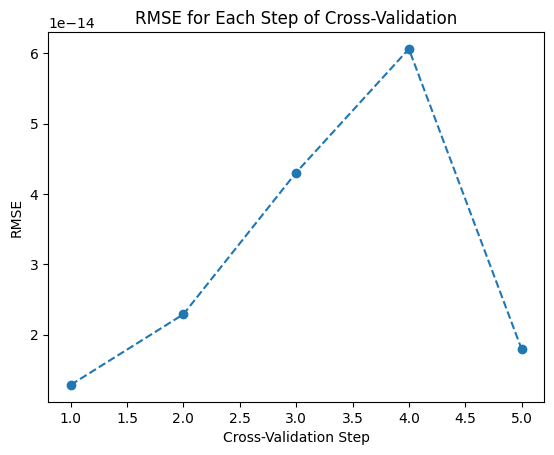

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

# Create and fit the linear regression model
lr_regressor = LinearRegression()
lr_regressor.fit(X_train, y_train)

# Perform cross-validation for RMSE
cv_scores = cross_val_score(lr_regressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_scores)  # Calculate RMSE from negative MSE

print("Cross-Validation RMSE Scores:", cv_rmse_scores)
print("Mean Cross-Validation RMSE:", cv_rmse_scores.mean())

# Plot RMSE for each step of cross-validation
plt.plot(range(1, 6), cv_rmse_scores, marker='o', linestyle='--')
plt.xlabel('Cross-Validation Step')
plt.ylabel('RMSE')
plt.title('RMSE for Each Step of Cross-Validation')
plt.show()


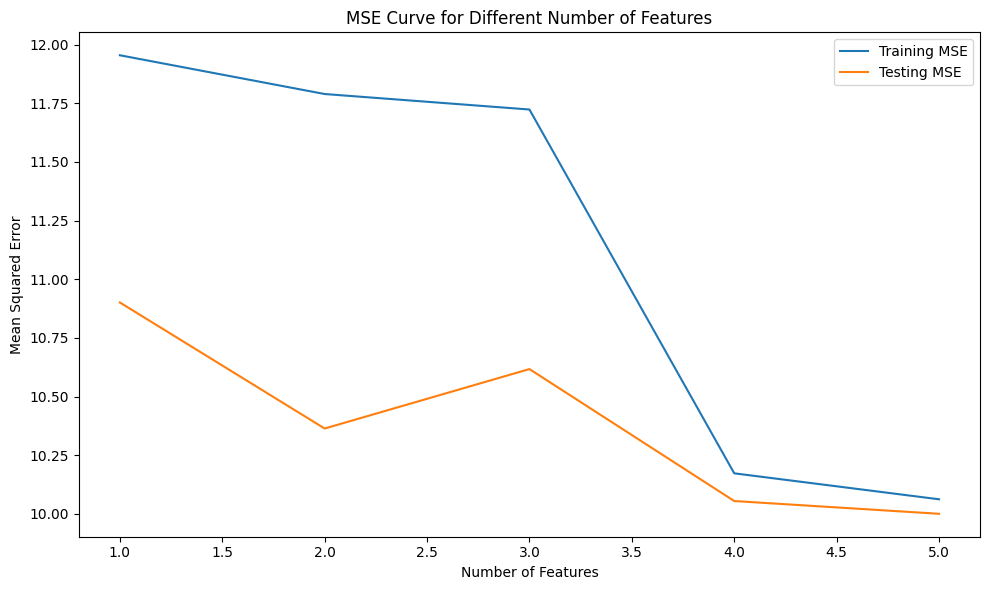

In [15]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Define a range of numbers of features (attributes)
num_features = [1, 2, 3, 4, 5]

train_errors = []
test_errors = []

for n in num_features:
    # Select the first 'n' features for training and testing
    X_train_subset = X_train.iloc[:, :n]
    X_test_subset = X_test.iloc[:, :n]

    # Create and fit the linear regression model
    model = LinearRegression()
    model.fit(X_train_subset, y_train)

    # Make predictions on the training and testing sets
    y_train_pred = model.predict(X_train_subset)
    y_test_pred = model.predict(X_test_subset)

    # Calculate the mean squared errors
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)

    # Append the errors to the lists
    train_errors.append(train_error)
    test_errors.append(test_error)

# Plot the MSE curve
plt.figure(figsize=(10, 6))
plt.plot(num_features, train_errors, label='Training MSE')
plt.plot(num_features, test_errors, label='Testing MSE')
plt.title('MSE Curve for Different Number of Features')
plt.xlabel('Number of Features')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.tight_layout()
plt.show()


In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Function to add noise to training data
def add_noise(data, noise_level=0.01):
    noise = noise_level * np.random.normal(size=data.shape)
    return data + noise

# Add noise to the training features (X_train) and target (y_train)
noise_level = 0.01  # Adjust the noise level as needed
X_train_noisy = add_noise(X_train, noise_level)
y_train_noisy = add_noise(y_train, noise_level)

# Ensure data integrity
assert len(X_train_noisy) > 0 and len(y_train_noisy) > 0, "Training data cannot be empty."
assert len(X_test) > 0 and len(y_test) > 0, "Test data cannot be empty."

# Create and evaluate a Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_noisy, y_train_noisy)
lr_pred = lr_model.predict(X_test)

# Avoid log errors in RMSLE by adding a small epsilon if necessary
epsilon = 1e-10  # To handle cases where values may be zero or negative
y_test_nonzero = np.maximum(y_test, epsilon)
lr_pred_nonzero = np.maximum(lr_pred, epsilon)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, lr_pred)
mse = mean_squared_error(y_test, lr_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, lr_pred)
rmsle = np.sqrt(np.mean((np.log1p(lr_pred_nonzero) - np.log1p(y_test_nonzero)) ** 2))
mape = np.mean(np.abs((y_test - lr_pred) / y_test_nonzero)) * 100

# Print the results
print(f"\nLinear Regression Model:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")



Linear Regression Model:
Mean Absolute Error (MAE): 0.01
Mean Squared Error (MSE): 0.00
Root Mean Squared Error (RMSE): 0.01
R-squared (R2): 1.00
Root Mean Squared Logarithmic Error (RMSLE): 0.00
Mean Absolute Percentage Error (MAPE): 0.09%


Cross-Validation RMSE Scores: [0.04454132 0.05056388 0.04724642 0.04894112 0.04990679]
Mean Cross-Validation RMSE: 0.048239905134116204


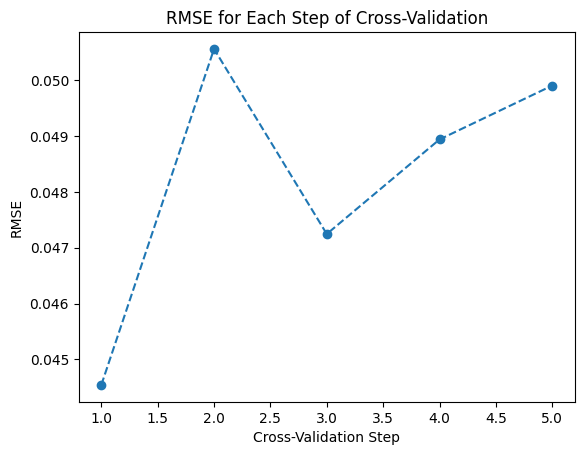

In [20]:
from sklearn.linear_model import LassoCV
import matplotlib.pyplot as plt

lasso_cv = LassoCV()
lasso_cv.fit(X_train, y_train)
cv_scores = cross_val_score(lasso_cv, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = (-cv_scores) ** 0.5
print("Cross-Validation RMSE Scores:", cv_rmse_scores)
print("Mean Cross-Validation RMSE:", cv_rmse_scores.mean())

# Plot RMSE for each step of cross-validation
plt.plot(range(1, 6), cv_rmse_scores, marker='o', linestyle='--')
plt.xlabel('Cross-Validation Step')
plt.ylabel('RMSE')
plt.title('RMSE for Each Step of Cross-Validation')
plt.show()


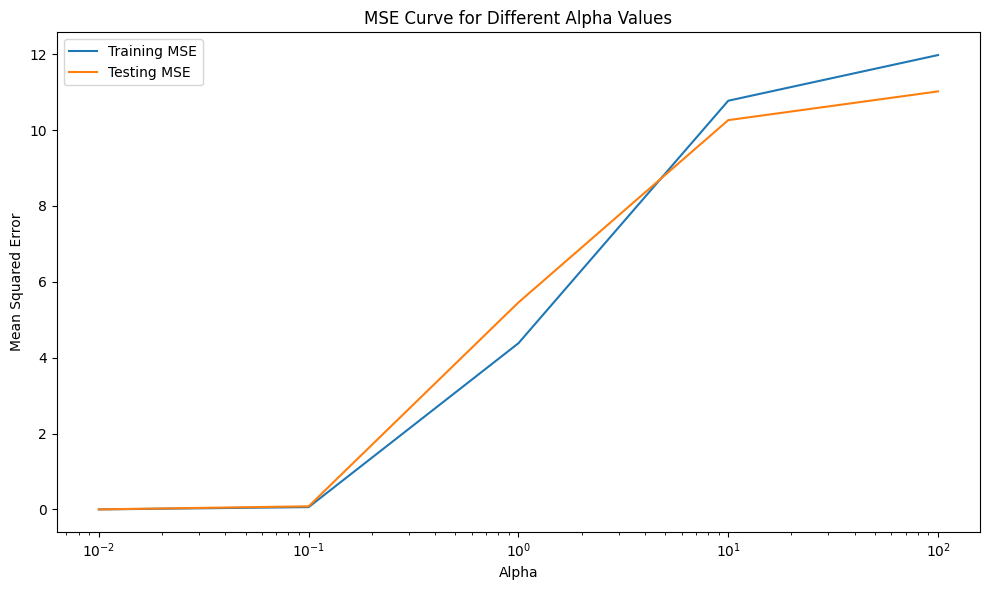

In [21]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Define a range of alphas
alphas = [0.01, 0.1, 1, 10, 100]

train_errors = []
test_errors = []

for alpha in alphas:
    # Train the Lasso regression model
    model = LassoCV(alphas=[alpha], cv=5)  # LassoCV automatically selects the best alpha through cross-validation
    model.fit(X_train, y_train)

    # Make predictions on the training and testing sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate the mean squared errors
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)

    # Append the errors to the lists
    train_errors.append(train_error)
    test_errors.append(test_error)

# Plot the MSE curve
plt.figure(figsize=(10, 6))
plt.plot(alphas, train_errors, label='Training MSE')
plt.plot(alphas, test_errors, label='Testing MSE')
plt.title('MSE Curve for Different Alpha Values')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.xscale('log')  # Since alphas are on a logarithmic scale
plt.legend()
plt.tight_layout()
plt.show()


In [22]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Define hyperparameters
cv_value = 5  # Example value, you can adjust this

# Create and evaluate LassoCV model with hyperparameters
lasso_cv = LassoCV(cv=cv_value)
lasso_cv.fit(X_train, y_train)
lasso_pred = lasso_cv.predict(X_test)

mae = mean_absolute_error(y_test, lasso_pred)
mse = mean_squared_error(y_test, lasso_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, lasso_pred)
rmsle = np.sqrt(np.mean(np.log1p(lasso_pred) - np.log1p(y_test)) ** 2)
mape = np.mean(np.abs((y_test - lasso_pred) / y_test)) * 100

print(f"\nLassoCV Model with Hyperparameters:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")



LassoCV Model with Hyperparameters:
Mean Absolute Error (MAE): 0.04
Mean Squared Error (MSE): 0.00
Root Mean Squared Error (RMSE): 0.05
R-squared (R2): 1.00
Root Mean Squared Logarithmic Error (RMSLE): 0.00
Mean Absolute Percentage Error (MAPE): 0.96%


In [23]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Define hyperparameters for KNN
n_neighbors_value = 5  # Example value, adjust as needed

# Create and evaluate KNeighborsRegressor model with hyperparameters
knn_reg = KNeighborsRegressor(n_neighbors=n_neighbors_value)
knn_reg.fit(X_train, y_train)  # Fit the model on the training data

# Predict using the trained KNN model
knn_pred = knn_reg.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, knn_pred)
mse = mean_squared_error(y_test, knn_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, knn_pred)
rmsle = np.sqrt(np.mean((np.log1p(knn_pred) - np.log1p(y_test)) ** 2))
mape = np.mean(np.abs((y_test - knn_pred) / y_test)) * 100

# Print the evaluation metrics
print(f"\nKNeighbors Regressor Model:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")



KNeighbors Regressor Model:
Mean Absolute Error (MAE): 2.32
Mean Squared Error (MSE): 7.97
Root Mean Squared Error (RMSE): 2.82
R-squared (R2): 0.27
Root Mean Squared Logarithmic Error (RMSLE): 0.40
Mean Absolute Percentage Error (MAPE): 46.76%


In [24]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Define hyperparameters for SVR
kernel_type = 'rbf'  # Example: 'linear', 'poly', 'rbf', 'sigmoid'
C_value = 1.0        # Regularization parameter
epsilon_value = 0.1  # Epsilon in the epsilon-SVR model

# Create and evaluate SVR model with hyperparameters
svr_model = SVR(kernel=kernel_type, C=C_value, epsilon=epsilon_value)
svr_model.fit(X_train, y_train)  # Fit the model on the training data

# Predict using the trained SVR model
svr_pred = svr_model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, svr_pred)
mse = mean_squared_error(y_test, svr_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, svr_pred)
rmsle = np.sqrt(np.mean((np.log1p(svr_pred) - np.log1p(y_test)) ** 2))
mape = np.mean(np.abs((y_test - svr_pred) / y_test)) * 100

# Print the evaluation metrics
print(f"\nSupport Vector Regression Model:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")



Support Vector Regression Model:
Mean Absolute Error (MAE): 2.43
Mean Squared Error (MSE): 9.68
Root Mean Squared Error (RMSE): 3.11
R-squared (R2): 0.12
Root Mean Squared Logarithmic Error (RMSLE): 0.43
Mean Absolute Percentage Error (MAPE): 52.93%


In [25]:
from sklearn.linear_model import HuberRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Define hyperparameters
epsilon_value = 1.35  # Example value, you can adjust this

# Create and evaluate HuberRegressor model with hyperparameters
huber_reg = HuberRegressor(epsilon=epsilon_value)
huber_reg.fit(X_train, y_train)
huber_pred = huber_reg.predict(X_test)

mae = mean_absolute_error(y_test, huber_pred)
mse = mean_squared_error(y_test, huber_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, huber_pred)
rmsle = np.sqrt(np.mean(np.log1p(huber_pred) - np.log1p(y_test)) ** 2)
mape = np.mean(np.abs((y_test - huber_pred) / y_test)) * 100

print(f"\nHuber Regressor Model with Hyperparameters:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print(f"Root Mean Squared Logarithmic Error (RMSLE): {rmsle:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")



Huber Regressor Model with Hyperparameters:
Mean Absolute Error (MAE): 0.03
Mean Squared Error (MSE): 0.00
Root Mean Squared Error (RMSE): 0.03
R-squared (R2): 1.00
Root Mean Squared Logarithmic Error (RMSLE): 0.00
Mean Absolute Percentage Error (MAPE): 0.49%


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
